# Rotational motion

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Rotation of a point mass around a point in space

In [8]:
 m = 1   ### Mass - SI unit: [m] = kg
 r = 1   ### Radius - [r] = m
 omega = 1  ### Angular velocity - [omega] = 1/s

### Calculate energy

In [9]:
Energy = 0.5*m*omega**2 * r**2

Energy

0.5

Rotation energy = kinetic energy 

## Rotation energy of multiple point masses

If we assume that all point masses belong to the same object, they have the same angular velocity omega.
Only the radius differs.

$E_\mathrm{rot} = \frac{I}{2}\omega^2 \\) with \\( I = m \sum_i r_i^2$: Moment of inertia

In [10]:
def pointrotational(masses, radii, omega):
    """Total rotational energy of system of point particles

    Args:
        masses(float32): mass
        radii (float32): radius
        omega (float32): angular frequency
    """
    ## considering axis be z axis thus omega in z direction
    ## r be position coordinates of masses
    energy = 0
    for mass, radius in zip(masses, radii):
        energy = energy + 0.5*mass*radius**2 * omega**2
        
    return energy

pointrotational([1.5, 3.4, 3.7], [-2, 4.5, 4], 4.0)
        

1072.4

### Rotating a stick around one end ( $ I = \frac{1}{3}ms^2 $ )

Text(0, 0.5, 'Y')

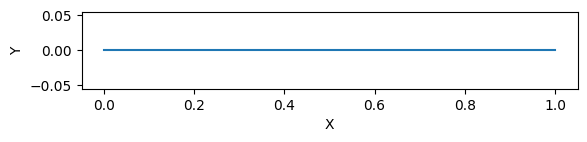

In [11]:
 s = 1                ### Length - Unit [s] = m
 num_points = 13
 x_list = np.linspace(0, s, num_points)
 fig = plt.figure()
 fig.set_alpha(0.5)
 fig.set_figheight(1)
 plt.plot(x_list, np.zeros(num_points))
 plt.xlabel("X")
 plt.ylabel("Y")

In [12]:
def rotating_rod(length,length_density, ic,omega, num_of_points = 100):
    """Gives rotational kinetic energy of rod

    Args:
        length (float32): Length of rod
        ic (float32): Initial condition where moment of inertia is zero
        length_density (float32): mass per unit length
        omega (float32): Angular frequency of rod
    """
    h = length / num_of_points   ## step size
    y = ic
    I = 0
    for i in range(num_of_points):
        f_n = length_density * y**2
        f_n1 = length_density * (y + h)**2
        I += h * (f_n + f_n1) / 2  # Modified Euler update
        y+= h
        
    return 0.5*I*omega**2

rotating_rod(1, 1, 0, 1.5)
    

0.3750187500000004

- analytical result:

 $$E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{with}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad\quad\quad \text{and}\quad \sigma = \frac{m}{s}\quad\text{length density}$$
 
 $$I = \frac{m}{s}\int_0^s\mathrm{d}r\, r^2$$
 
 $$I = \frac{m}{s} \frac{1}{3}[r^3]_{r=0}^{r=s}$$
 
 $$I = \frac{1}{3}ms^2$$

In [13]:
m, l, omega = 1, 1, 1.5
(m*l**2 / 3)*0.5*omega**2

0.375

### Rotating a stick around the middle ( $I = \frac{1}{12}ms^2$ )

- analytical result:

 $$E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{with}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad\quad\quad \text{and}\quad \sigma = \frac{m}{s}\quad\text{length density}$$
 
 $$I = \frac{m}{s}\int_{-s/2}^{s/2}\mathrm{d}r\, r^2$$
 
 $$I = \frac{m}{s} \frac{1}{3}[r^3]_{r=-s/2}^{r=s/2}$$
 
 $$I = \frac{m}{s} \frac{1}{3}\left[\frac{s^3}{8}-\left(-\frac{s^3}{8}\right)\right]$$
 
 $$I = \frac{1}{12}ms^2$$

### Rotating a sphere around the z axis ( $I = \frac{2}{5}mR^2$ )

In [15]:
num_points = 50    ### just for plotting
coord_list = []
counter = 0
contribution = 0
for x in np.linspace(-r, r, num_points):
    for y in np.linspace(-r, r, num_points):
        for z in np.linspace(-r, r, num_points):
            if (np.linalg.norm([x, y, z]) <= r):
                coord_list.append([x,y,z])
                counter += 1
                contribution = contribution + np.linalg.norm([x, y, 0])**2


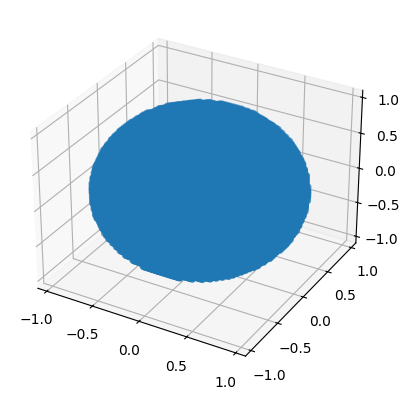

In [23]:
coord_list = np.transpose(coord_list)
plt3d = plt.axes(projection= '3d')
plt3d.scatter(coord_list[0], coord_list[1], coord_list[2])

In [24]:
(m / counter) * contribution /2 * omega**2

np.float64(0.4491700619163969)

In [25]:
(0.4*1*1)*0.5*2.25

0.45

- analytical result

 $$E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{with}\quad \mathrm{d}m = \rho\,\mathrm{d}V \quad\quad\quad \text{and}\quad \rho=\frac{m}{V} \quad\text{(volume) density}$$
 
 $$I = \frac{m}{V}\int_V\mathrm{d}V\, r^2$$
 
 use cylindrical coordinates
 
 $$I = \frac{m}{V}\int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)}\int_{\varphi=0}^{2\pi}\,r\,\mathrm{d}r\mathrm{d}z\mathrm{d}\varphi\, r^2$$
 
 Calculate polar-angle integral and use $\tilde{R}(z) = \sqrt{R^2-z^2} $
 
  $$I = \frac{m}{V} \left(\int_{\varphi=0}^{2\pi}\,\mathrm{d}\varphi\right)\, \int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)} r^3 \,\mathrm{d}r\mathrm{d}z$$
  
  $$I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \left[\frac{1}{4}r^4\right]_{r=0}^{\sqrt{R^2-z^2}} \,\mathrm{d}z $$
  
  $$I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \frac{1}{4}\left(R^2-z^2\right)^2 \,\mathrm{d}z$$
  
  $$I = \frac{m}{V} \frac{\pi}{2}\,\int_{z=-R}^{R} \left(R^4-2R^2z^2+z^4\right) \,\mathrm{d}z $$
  
  $$I = \frac{m}{V} \frac{\pi}{2}\,\left[R^4z-\frac{2}{3}R^2z^3+\frac{1}{5}z^5\right]_{z=-R}^{R}$$
  
  $$I = \frac{m}{V} \frac{\pi}{2}\,2\left(R^5-\frac{2}{3}R^5+\frac{1}{5}R^5\right)$$
  
  $$I = \frac{m}{V} \pi\,\frac{8}{15}R^5$$
  
 use volume of the sphere $V = \frac{4}{3}\pi R^3 $
 
 $$I = m \frac{\frac{8}{15}\pi R^5}{\frac{4}{3}\pi R^3}$$
 
 $$I = \frac{2}{5}mR^2$$

### Rotating a spherical shell around the z axis ( $I = \frac{2}{5}m\frac{r_1^5-r_2^5}{r_1^3-r_2^3} $ )

In [26]:
### Analytical result
m = 1.0
r1 = 1.0
r2 = 1.5
omega = 1.0

0.5*(0.4*m*((r1**5 - r2**5) / (r1**3 - r2**3)))*omega**2

0.5552631578947368

In [27]:
### Numerical result
num_points = 50    ### just for plotting
coord_list = []
counter = 0
contribution = 0
for x in np.linspace(-r, r, num_points):
    for y in np.linspace(-r, r, num_points):
        for z in np.linspace(-r, r, num_points):
            if (r1 <= np.linalg.norm([x, y, z]) <= r2):
                coord_list.append([x,y,z])
                counter += 1
                contribution = contribution + np.linalg.norm([x, y, 0])**2
